In [20]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-14 02:05:01,194: Credentials are already in use. The existing account in the session will be replaced.


The bigger number is 6


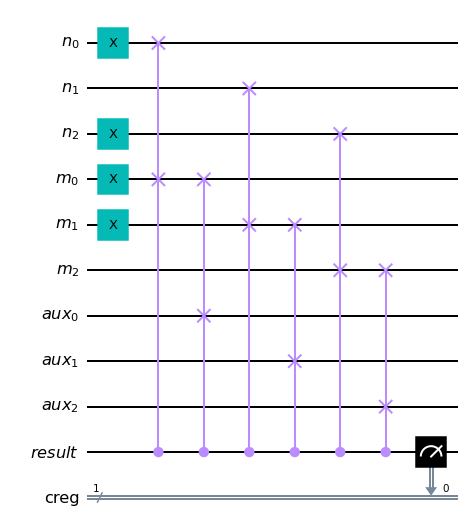

In [38]:
def comparison(number1, number2):
    
    #convert number1 and number2 to binary
    binary1 = format(number1, 'b')
    binary2 = format(number2, 'b')
    
    #this will be the size of the aux register
    max_length = max(len(binary1), len(binary2))
    
    #create some registers for the numbers, the extra qubits, and the result
    nr = QuantumRegister(max_length, 'n')
    mr = QuantumRegister(max_length, 'm')
    aux = QuantumRegister(max_length, 'aux')
    result = QuantumRegister(1, "result")
    cr = ClassicalRegister(1, "creg")
    
    nqubits = max_length * 3 + 1
    
    #define the circuit
    qc = QuantumCircuit(nr, mr, aux, result, cr)
    
    #encode number1
    for i in range(len(binary1)):
        if binary1[i] == "1":
            qc.x(nr[i])
            
    #encode number2
    for i in range(len(binary2)):
        if binary2[i] == "1":
            qc.x(mr[i])
    
    #compare each number 
    for i in range(max_length):
        qc.cswap(result, nr[i], mr[i])
        qc.cswap(result, mr[i], aux[i])
    
    qc.measure(result[0], cr[0])
    
    # execute the circuit on a simulator
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend, shots=1).result().get_counts()
    
    # determine which number is bigger and print it
    if list(counts.keys())[0] == '1':
        print(f"The bigger number is {number1}")
    else:
        print(f"The bigger number is {number2}")
    
    return qc.draw()

comparison(5, 6)
